## EXAMPLE image EDA 

In [1]:

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster


In [2]:

#read image
image_1 = plt.imread('./meteor_challenge_01.png')


In [3]:

# Some functions

def print_image(image):
    fig, axe = plt.subplots(figsize=(15,15))
    axe.imshow(image)
    axe.axis('off')
    

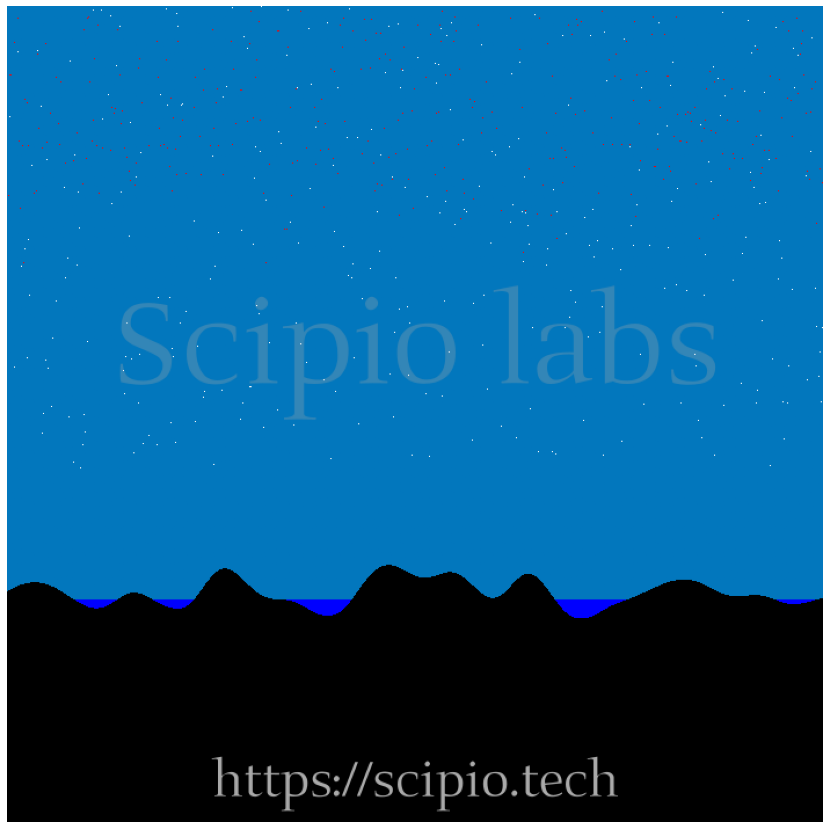

In [4]:

# show image
print_image(image_1)

In [5]:
image_1.shape

(704, 704, 4)

In [6]:
image_1[0]

array([[0.00784314, 0.46666667, 0.7411765 , 1.        ],
       [0.00784314, 0.46666667, 0.7411765 , 1.        ],
       [0.00784314, 0.46666667, 0.7411765 , 1.        ],
       ...,
       [0.00784314, 0.46666667, 0.7411765 , 1.        ],
       [0.00784314, 0.46666667, 0.7411765 , 1.        ],
       [0.00784314, 0.46666667, 0.7411765 , 1.        ]], dtype=float32)

In [7]:

def convert_CMYK_to_RGB(image):
    image_rgb = np.array([])
    i = 0
    for line in image:
        #print(line[1][1])
        red = np.round(255 * ( 1 - (line[0]/100) ) * ( 1 - (line[3]/ 100) ))
        green = np.round(255 * ( 1 - line[1] / 100 ) * ( 1 - line[3]/100 ))
        blue = np.round(255 * ( 1 -  line[2] / 100 ) * ( 1 - line[3]/100 ))
        i+=1
        image_rgb = np.append(image_rgb, np.array([red, green, blue]))
    
    return image_rgb

image_rgb_vet = convert_CMYK_to_RGB(image_1)

In [8]:
#image_rgb_vet.shape
#image_rgb = np.reshape(image_rgb_vet, (704, 704))

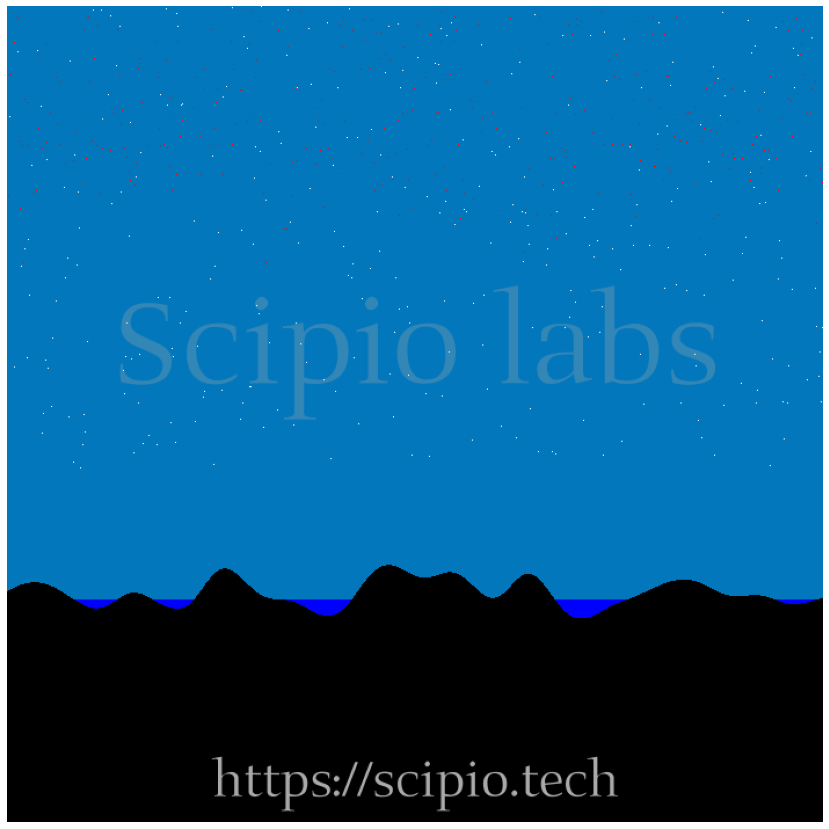

In [9]:

image_1_round = np.round(image_1, 2); image_1_round
print_image(image_1_round)

In [10]:
image_vet_00 = np.reshape(image_1, (704*704, 4))
pixel_df = pd.DataFrame(image_vet_00, columns=['C','M','Y','B']); pixel_df

,C,M,Y,B
0,0.007843,0.466667,0.741176,1.0
1,0.007843,0.466667,0.741176,1.0
2,0.007843,0.466667,0.741176,1.0
3,0.007843,0.466667,0.741176,1.0
4,0.007843,0.466667,0.741176,1.0
...,...,...,...,...
495611,0.000000,0.000000,0.000000,1.0
495612,0.000000,0.000000,0.000000,1.0
495613,0.000000,0.000000,0.000000,1.0
495614,0.000000,0.000000,0.000000,1.0


In [11]:
pixel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495616 entries, 0 to 495615
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C       495616 non-null  float32
 1   M       495616 non-null  float32
 2   Y       495616 non-null  float32
 3   B       495616 non-null  float32
dtypes: float32(4)
memory usage: 7.6 MB


In [12]:
pixel_df.value_counts()[0:20]

C         M         Y         B  
0.007843  0.466667  0.741176  1.0    343695
0.000000  0.000000  0.000000  1.0    135875
0.200000  0.525490  0.717647  1.0      7261
0.000000  0.000000  1.000000  1.0      1535
0.666667  0.666667  0.666667  1.0      1268
1.000000  0.000000  0.000000  1.0       328
          1.000000  1.000000  1.0       315
0.047059  0.478431  0.737255  1.0       140
0.180392  0.517647  0.717647  1.0       121
0.003922  0.003922  0.003922  1.0       116
0.019608  0.470588  0.741176  1.0       113
0.027451  0.470588  0.737255  1.0       103
0.011765  0.470588  0.741176  1.0       100
0.054902  0.482353  0.737255  1.0        96
0.035294  0.474510  0.737255  1.0        94
0.392157  0.392157  0.392157  1.0        87
0.043137  0.478431  0.737255  1.0        86
0.098039  0.494118  0.733333  1.0        77
0.254902  0.254902  0.254902  1.0        73
0.196078  0.521569  0.713726  1.0        72
dtype: int64

In [13]:
pixel_df['B'].value_counts()

1.0    495616
Name: B, dtype: int64

In [14]:
indices = np.where(np.all(image_1 == np.array([0.007843,  0.466667,  0.741176,  1.0]), axis=-1))

In [15]:
indices;

In [16]:
indices[0].shape

(0,)

In [17]:
image_1[4][210]

array([1., 0., 0., 1.], dtype=float32)

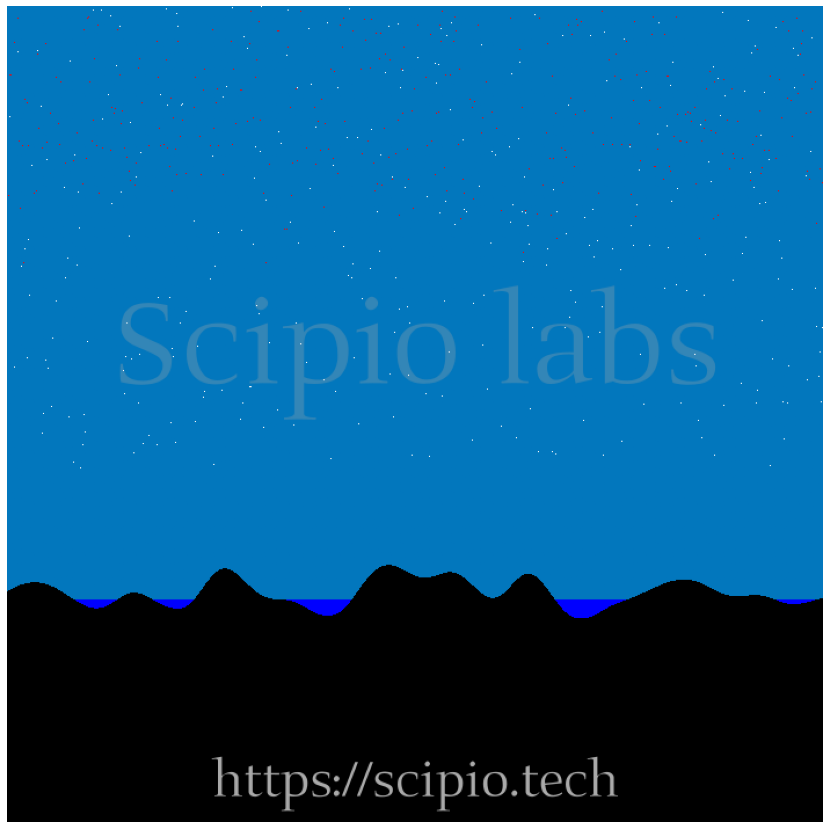

In [18]:

fig, axe = plt.subplots(1, figsize=(15,15))
axe.imshow(image_1)
#axe.scatter(x=indices[1], y=indices[0])
axe.scatter(x=indices[1], y = indices[0], s=80, facecolors='none', edgecolors='black')
axe.axis('off')
plt.show()


    Red = 255 × ( 1 - Cyan ÷ 100 ) × ( 1 - Black ÷ 100 )
    Green = 255 × ( 1 - Magenta ÷ 100 ) × ( 1 - Black ÷ 100 )
    Blue = 255 × ( 1 - Yellow ÷ 100 ) × ( 1 - Black ÷ 100 )


In [19]:
red = 255 * ( 1 - (0.00784314 /100) ) * ( 1 - (1 / 100) )
Green = 255 * ( 1 - 0.46666667 / 100 ) * ( 1 - 1 / 100 )
Blue = 255 * ( 1 -  0.7411765 / 100 ) * ( 1 - 1 / 100 )

print(red, Green, Blue)

252.43019999307 251.27189999158497 250.57889992575002


In [20]:
np.round(red)

252.0

In [21]:
image_1_round = np.round(image_1, 2)
image_vet_round = np.reshape(image_1_round, (704*704, 4))
pixel_df_round = pd.DataFrame(image_vet_round, columns=['C','M','Y','B']); pixel_df_round

,C,M,Y,B
0,0.01,0.47,0.74,1.0
1,0.01,0.47,0.74,1.0
2,0.01,0.47,0.74,1.0
3,0.01,0.47,0.74,1.0
4,0.01,0.47,0.74,1.0
...,...,...,...,...
495611,0.00,0.00,0.00,1.0
495612,0.00,0.00,0.00,1.0
495613,0.00,0.00,0.00,1.0
495614,0.00,0.00,0.00,1.0


In [22]:
image_1_round;

In [23]:

# Fist line: Céu
# Second line: GROUND
# tER: Frase céu 
# quarta: LAGOS
# Quinta: frase GROUND
# Sexta: Meteoros
# Setima: Estrelas
# Oitava: Ruído frase do céu
# Nona: Ruído frase do céu
# 10: Ruído frase do céu
# 11: Ruído frase do céu
# 12: Ruído frase do céu
# 13: Ruído frase do céu
# 14: Ruído frase do céu
# 15: Ruído frase do céu

pixel_df_round.value_counts()[0:20]

C     M     Y     B  
0.01  0.47  0.74  1.0    343866
0.00  0.00  0.00  1.0    135991
0.20  0.53  0.72  1.0      7261
0.00  0.00  1.00  1.0      1535
0.67  0.67  0.67  1.0      1268
1.00  0.00  0.00  1.0       328
      1.00  1.00  1.0       315
0.05  0.48  0.74  1.0       271
0.02  0.47  0.74  1.0       260
0.18  0.52  0.72  1.0       245
0.03  0.47  0.74  1.0       174
0.04  0.47  0.74  1.0       162
0.19  0.52  0.72  1.0       140
0.10  0.49  0.73  1.0       139
0.09  0.49  0.73  1.0       138
0.15  0.51  0.72  1.0       109
0.16  0.51  0.72  1.0       107
0.39  0.39  0.39  1.0        98
0.25  0.25  0.25  1.0        93
0.07  0.49  0.73  1.0        90
dtype: int64

In [24]:
indices_round = np.where(np.all(image_1_round == np.array([0.6,  0.6,  0.6,  1.0]), axis=-1))
indices_round[0].shape

(0,)

In [25]:
ind = np.where(np.all(image_1_round == [0.67, 0.67, 0.67,  1.0])); ind[0].shape

(0,)

In [26]:
np.where((image_1_round == [0.67, 0.67, 0.67,  1.0]), 1, 0);

In [27]:
(np.array([0.67, 0.67, 0.67,  1.0]) == [0.67, 0.67, 0.67,  1.0]).any()

True

In [28]:
image_1_round[0][0]

array([0.01, 0.47, 0.74, 1.  ], dtype=float32)

In [29]:

def x_y_pixels_equal(image, pixel_char):
    x = np.array([])
    y = np.array([])

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(np.allclose(image[i][j],pixel_char)):
                x = np.append(x, j)
                y = np.append(y, i)
    
    return (x,y)

            
pixels_ceu = x_y_pixels_equal(image_1_round, [0.01,  0.47,  0.74,  1.0])
pixels_star = x_y_pixels_equal(image_1_round,[1.00, 1.00,  1.00,  1.0])
pixels_meteor = x_y_pixels_equal(image_1_round,[1.00,  0.00,  0.00,  1.0])
pixels_lago = x_y_pixels_equal(image_1_round,[0.00,  0.00,  1.00,  1.0])

In [30]:
pixels_star = x_y_pixels_equal(image_1_round,[1.00, 1.00,  1.00,  1.0])
pixels_star;

In [31]:
#de12 = x_y_pixels_equal(image_1_round, [0.04,  0.47,  0.74,  1.0]); de12[0].shape
#de13 = x_y_pixels_equal(image_1_round, [0.19,  0.52,  0.72,  1.0]); de13[0].shape
de15 = x_y_pixels_equal(image_1_round, [0.09,  0.49,  0.73,  1.0]); de15[0].shape

(138,)

In [34]:
#np.allclose(np.array([0.02  0.47  0.74  1.0]), pixel)

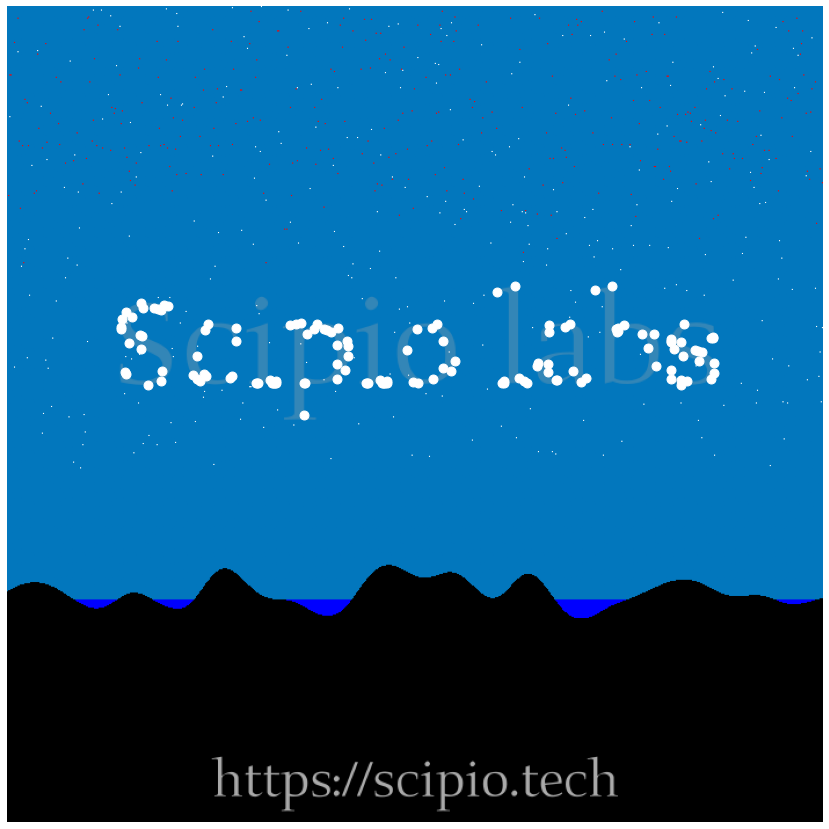

In [35]:
fig, axe = plt.subplots(1, figsize=(15,15))
axe.imshow(image_1)
#axe.scatter(x=ind[1], y=ind[0])
#axe.scatter(x=pixels_ceu[0], y = pixels_ceu[1], s=80, color='white', edgecolors='white')
#axe.scatter(x=pixels_ceu[0], y = pixels_ceu[1], s=80, facecolors='none', edgecolors='white')
#axe.scatter(pixels_star[0], pixels_star[1], color='black')
#axe.scatter(x=pixels_meteor[0], y = pixels_meteor[1], color='black')
#axe.scatter(pixels_meteor[0], pixels_meteor[1], color='black', s=100)
#axe.plot(pixels_star[0], pixels_star[1], color='red')
axe.scatter(x=de15[0], y = de15[1], s=80, color='white', edgecolors='white')
axe.axis('off')
plt.show()

In [36]:

# cont meteoros nos lagos

print(pixels_meteor[0].shape)
print(pixels_lago[0].shape)

cont = 0

# A ideia usada foi meio que projetar a componente x de cada meteor nas componentes x dos lagos, pegando quando
# os componentes são iguais. 
for meteor_x in pixels_meteor[0]:
    for lago_x in pixels_lago[0]:
        if(meteor_x == lago_x):
            cont+=1
            break

print(cont)

(328,)
(1535,)
105


### First Task

<b>1.</b>Count the number of Stars

Pelo arquivo STAR

### Applying KMeans

In [111]:
image_t = image_1[:150,:,:]

In [112]:
image_vet = np.reshape(image_t, (704*150, 4))

In [120]:

model_kmeans = cluster.KMeans(3)
clusters = model_kmeans.fit_predict(image_vet)

In [121]:
pd.value_counts(clusters)

0    105205
1       284
2       111
dtype: int64

In [116]:
clustered_image = np.reshape(clusters, (150, 704))

In [49]:
#print_image(clustered_image)

In [122]:
x, y = x_y_pixels_equal(clustered_image, [1])

In [130]:
xy = np.vstack((x,y)).T; xy

array([[210.,   4.],
       [253.,   4.],
       [375.,   4.],
       [513.,   4.],
       [ 70.,   9.],
       [386.,   9.],
       [557.,   9.],
       [577.,   9.],
       [  9.,  10.],
       [ 69.,  10.],
       [290.,  10.],
       [434.,  10.],
       [459.,  10.],
       [681.,  10.],
       [308.,  11.],
       [314.,  11.],
       [491.,  11.],
       [217.,  13.],
       [495.,  13.],
       [541.,  13.],
       [669.,  13.],
       [ 78.,  16.],
       [287.,  16.],
       [354.,  16.],
       [373.,  16.],
       [406.,  16.],
       [484.,  16.],
       [492.,  16.],
       [ 66.,  20.],
       [ 95.,  20.],
       [177.,  20.],
       [233.,  21.],
       [234.,  21.],
       [298.,  21.],
       [387.,  21.],
       [674.,  21.],
       [686.,  21.],
       [318.,  23.],
       [322.,  23.],
       [365.,  24.],
       [487.,  24.],
       [556.,  24.],
       [567.,  24.],
       [309.,  29.],
       [129.,  30.],
       [147.,  30.],
       [193.,  30.],
       [374.,

In [146]:
xy_sort = np.sort(xy); xy_sort[:5]

array([[  4., 210.],
       [  4., 253.],
       [  4., 375.],
       [  4., 513.],
       [  9.,  70.]])

In [152]:

m = []
for l in xy_sort:
    m.append([l[1], l[0]])
m = np.array(m)
m

array([[210.,   4.],
       [253.,   4.],
       [375.,   4.],
       [513.,   4.],
       [ 70.,   9.],
       [386.,   9.],
       [557.,   9.],
       [577.,   9.],
       [ 10.,   9.],
       [ 69.,  10.],
       [290.,  10.],
       [434.,  10.],
       [459.,  10.],
       [681.,  10.],
       [308.,  11.],
       [314.,  11.],
       [491.,  11.],
       [217.,  13.],
       [495.,  13.],
       [541.,  13.],
       [669.,  13.],
       [ 78.,  16.],
       [287.,  16.],
       [354.,  16.],
       [373.,  16.],
       [406.,  16.],
       [484.,  16.],
       [492.,  16.],
       [ 66.,  20.],
       [ 95.,  20.],
       [177.,  20.],
       [233.,  21.],
       [234.,  21.],
       [298.,  21.],
       [387.,  21.],
       [674.,  21.],
       [686.,  21.],
       [318.,  23.],
       [322.,  23.],
       [365.,  24.],
       [487.,  24.],
       [556.,  24.],
       [567.,  24.],
       [309.,  29.],
       [129.,  30.],
       [147.,  30.],
       [193.,  30.],
       [374.,

In [124]:
x2, y2 = x_y_pixels_equal(clustered_image, [2])

In [110]:
x.shape

(244,)

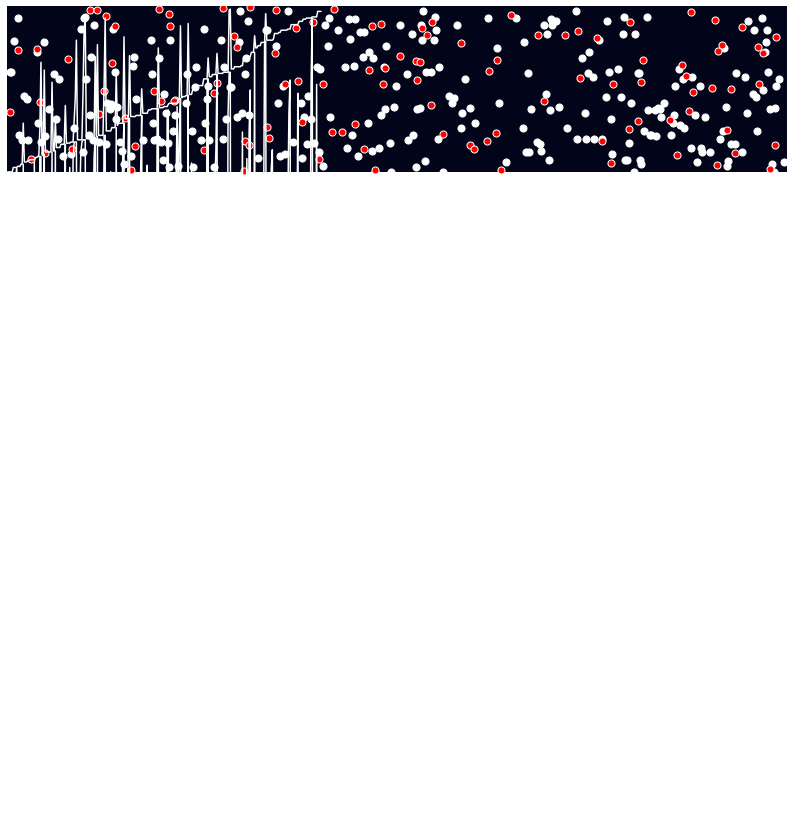

In [154]:

fig, axe = plt.subplots(1, figsize=(15,15))
axe.imshow(clustered_image)
axe.scatter(x=x, y = y, s=50, color='white', edgecolors='white')
axe.plot(m[::-1], color='white')
axe.scatter(x=x2, y = y2, s=50, color='red', edgecolors='white')
axe.axis('off')
plt.show()